In [67]:
import pandas as pd
from matplotlib import pyplot as plt, ticker as mtick
import plotly.express as px
import seaborn as sns

In [68]:
df = pd.read_csv('../data/engineered/engineered_gym_dataset.csv')

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age                         973 non-null    int64  
 1   weight                      973 non-null    float64
 2   height                      973 non-null    float64
 3   max_bpm                     973 non-null    int64  
 4   avg_bpm                     973 non-null    int64  
 5   resting_bpm                 973 non-null    int64  
 6   session_duration            973 non-null    float64
 7   calories_burned             973 non-null    float64
 8   fat_percentage              973 non-null    float64
 9   water_intake                973 non-null    float64
 10  workout_frequency           973 non-null    int64  
 11  experience_level            973 non-null    int64  
 12  bmi                         973 non-null    float64
 13  gender_Female               973 non

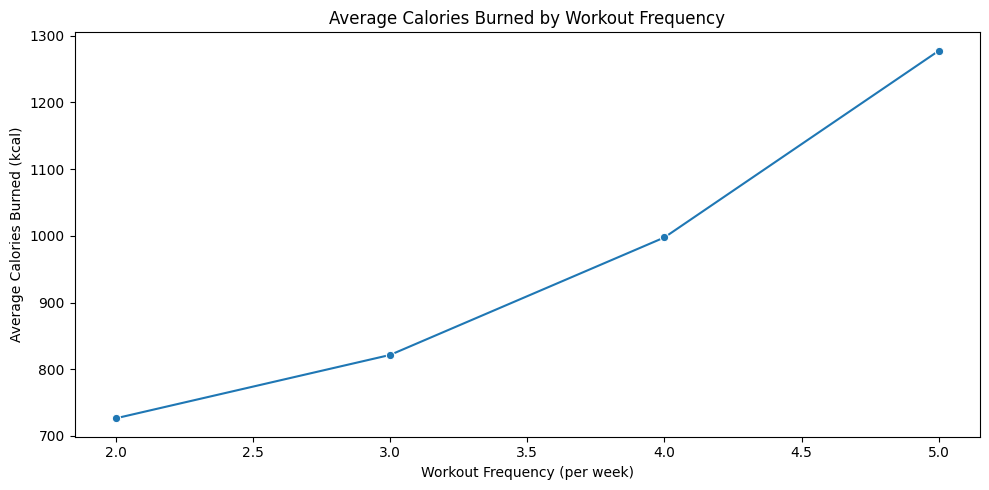

In [70]:
avg_cal_by_freq = df.groupby('workout_frequency')['calories_burned'].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(x='workout_frequency', y='calories_burned', data=avg_cal_by_freq, marker='o')
plt.title("Average Calories Burned by Workout Frequency")
plt.xlabel("Workout Frequency (per week)")
plt.ylabel("Average Calories Burned (kcal)")
plt.tight_layout()
plt.savefig('../visuals/AvgCalories_by_WorkoutFrequency.png') 
plt.show()


<Figure size 1500x600 with 0 Axes>

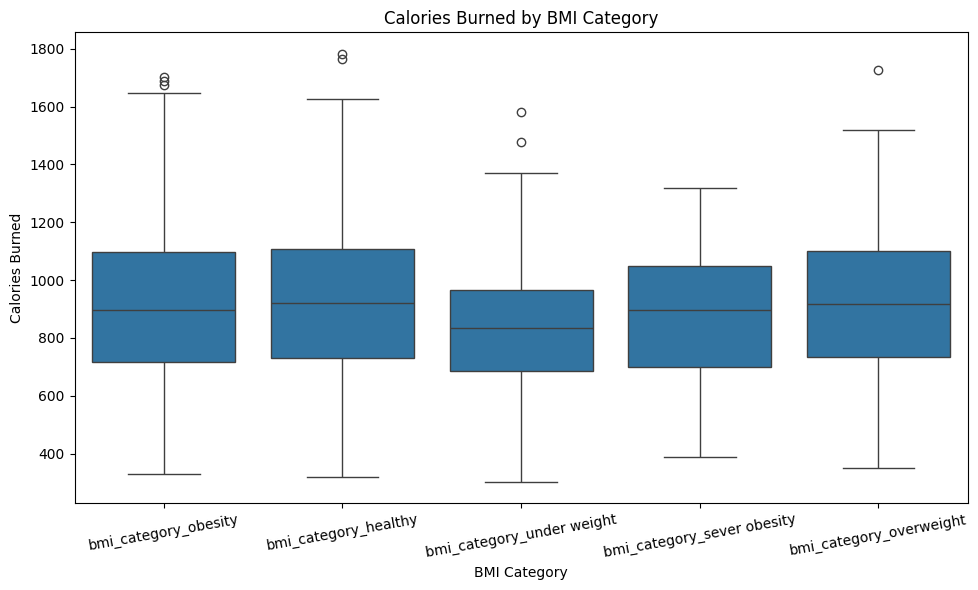

In [71]:
plt.figure(figsize=(15,6))
bmi_cols = [col for col in df.columns if col.startswith('bmi_category_')]
df['bmi_category'] = df[bmi_cols].idxmax(axis=1)  # one-hot dan original kategoriya
plt.figure(figsize=(10,6))
sns.boxplot(x='bmi_category', y='calories_burned', data=df)
plt.title("Calories Burned by BMI Category")
plt.xlabel("BMI Category")
plt.ylabel("Calories Burned")
plt.xticks(rotation=10)

plt.tight_layout()
plt.savefig('../visuals/Calories_by_BMICategory.png')
plt.show()


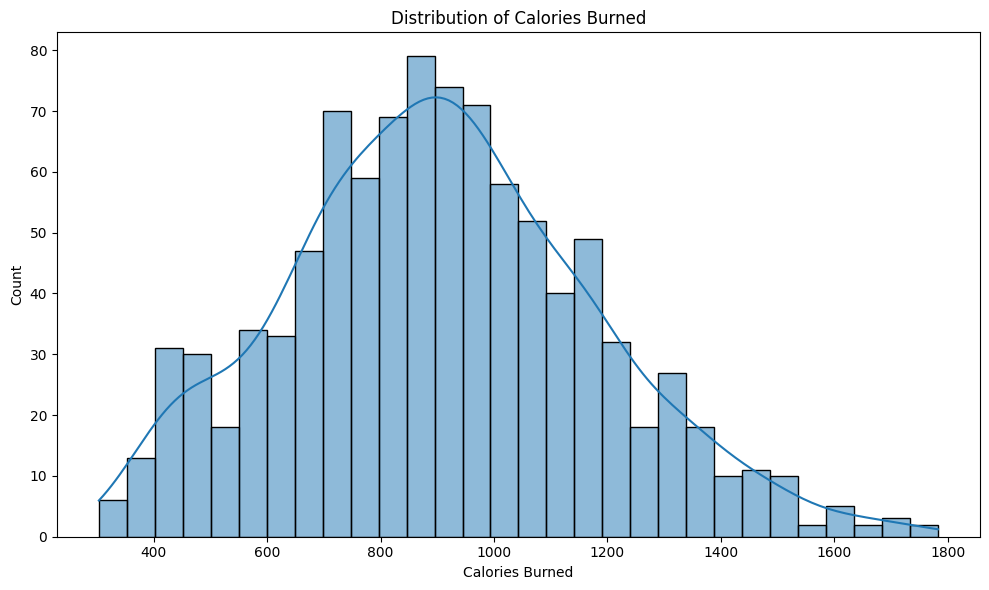

In [72]:
plt.figure(figsize=(10,6))
sns.histplot(df['calories_burned'], bins=30, kde=True)
plt.title("Distribution of Calories Burned")
plt.xlabel("Calories Burned")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig('../visuals/Calories_distribution.png')
plt.show()


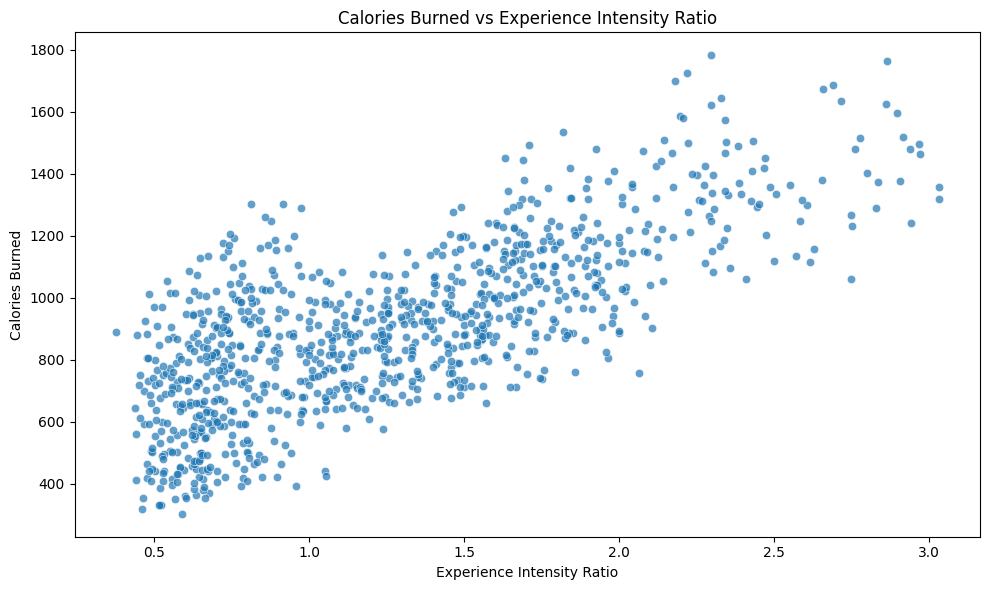

In [73]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='experience_intensity_ratio', y='calories_burned', alpha=0.7, data=df)
plt.title("Calories Burned vs Experience Intensity Ratio")
plt.xlabel("Experience Intensity Ratio")
plt.ylabel("Calories Burned")
plt.tight_layout()
plt.savefig('../visuals/Calories_vs_ExperienceIntensity.png')
plt.show()


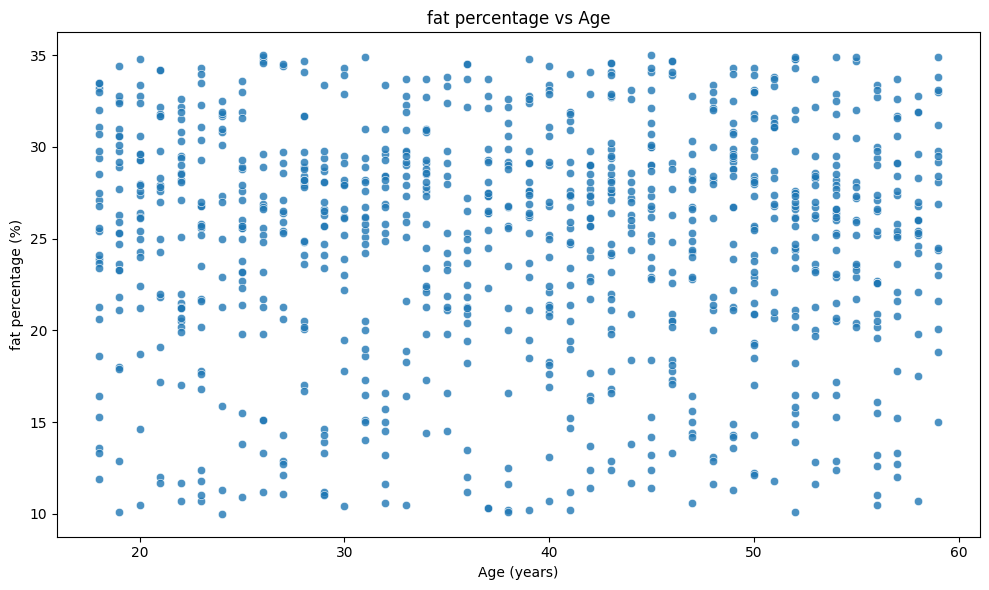

In [74]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='fat_percentage', alpha=0.8, data=df)
plt.title("fat percentage vs Age")
plt.xlabel("Age (years)")
plt.ylabel("fat percentage (%)")
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.tight_layout()
plt.savefig('../visuals/fat_vs_Age.png')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_23972\1712236695.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




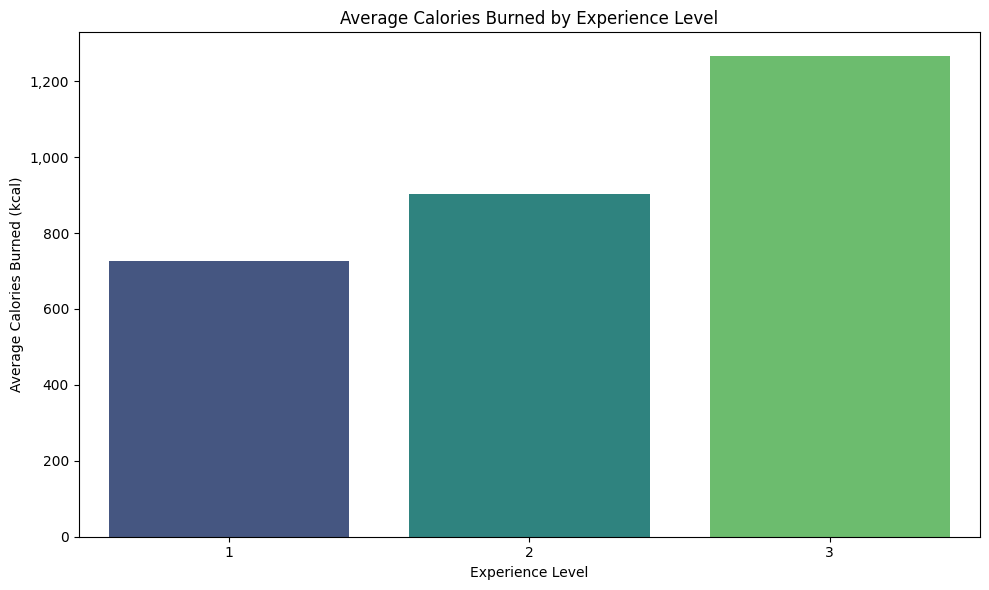

In [75]:
avg_cal_by_exp = df.groupby('experience_level')['calories_burned'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='experience_level', y='calories_burned', data=avg_cal_by_exp, palette='viridis')
plt.title("Average Calories Burned by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Average Calories Burned (kcal)")
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.tight_layout()
plt.savefig('../visuals/AvgCalories_by_ExperienceLevel.png')
plt.show()

<Figure size 1200x1200 with 0 Axes>

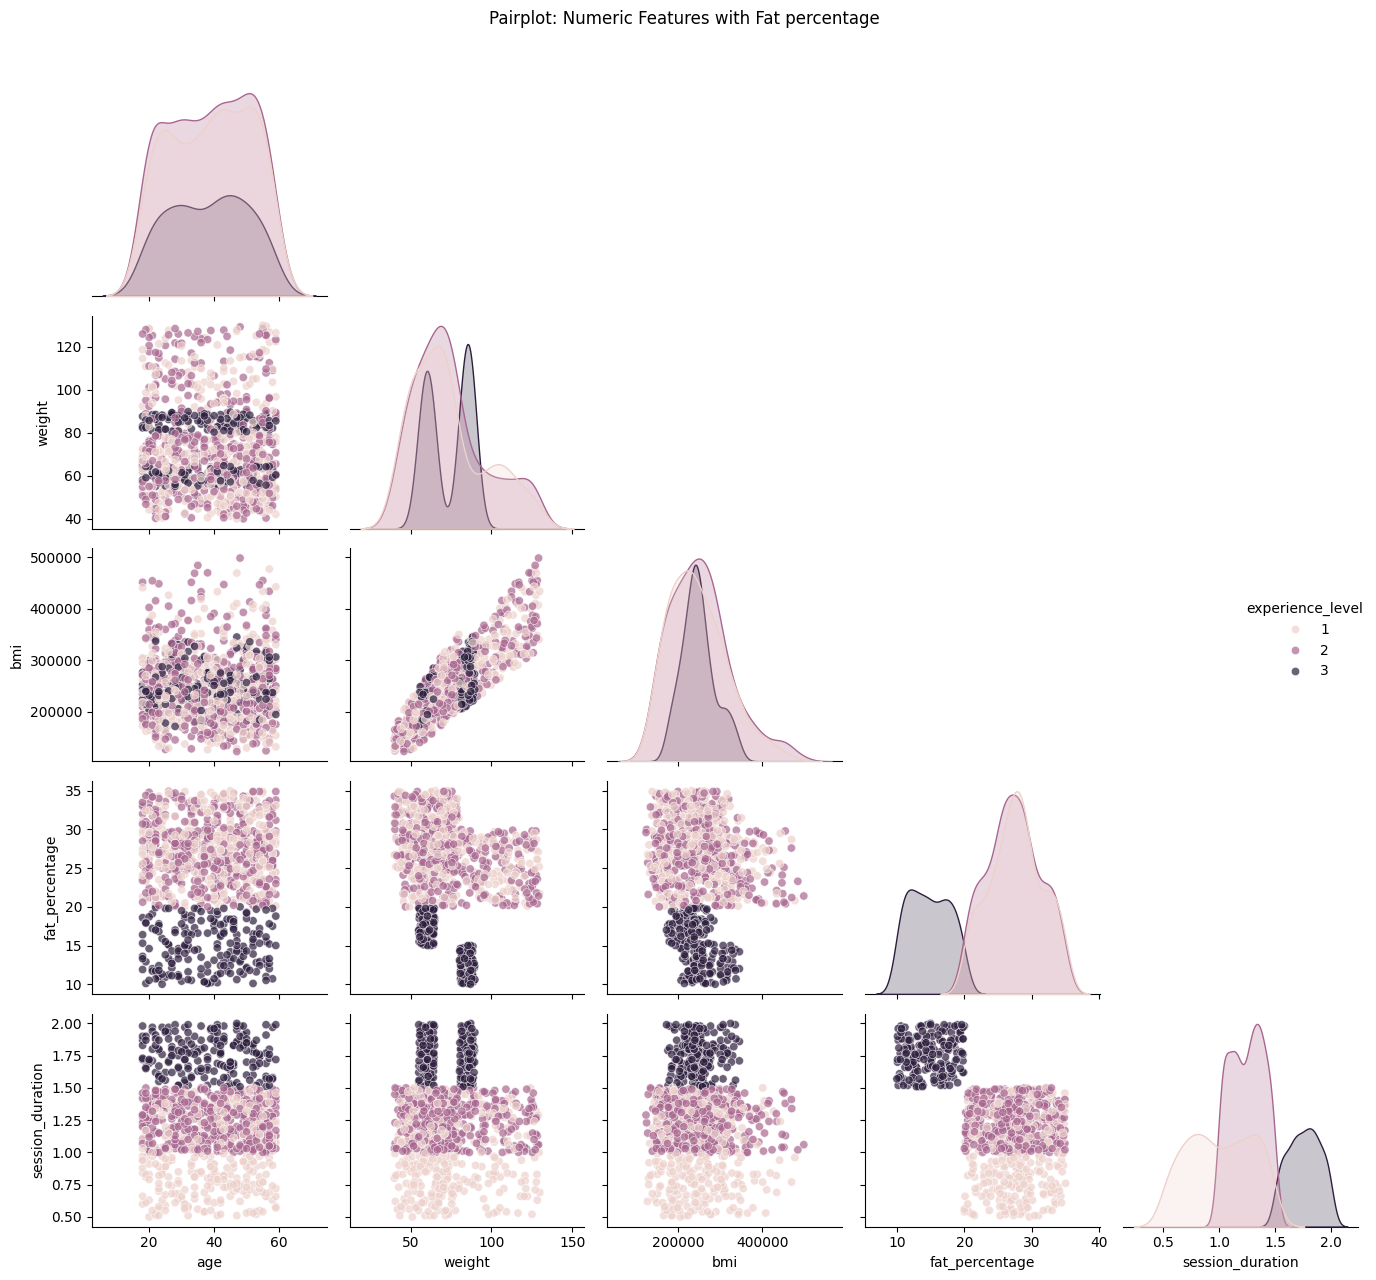

In [76]:
plt.figure(figsize=(12,12))
sns.pairplot(df[['age','weight','bmi','fat_percentage','session_duration','experience_level']],
             hue='experience_level', corner=True, plot_kws={'alpha':0.7})
plt.suptitle("Pairplot: Numeric Features with Fat percentage", y=1.02)
plt.tight_layout()
plt.savefig('../visuals/Pairplot_NumericFeatures.png')
plt.show()


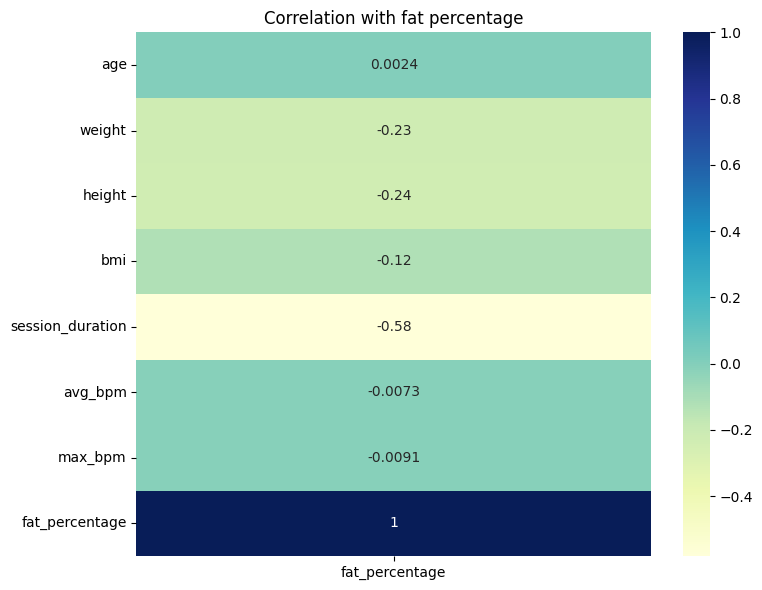

In [77]:
plt.figure(figsize=(8,6))
corr = df[['age','weight','height','bmi','session_duration','avg_bpm','max_bpm','fat_percentage']].corr()
sns.heatmap(corr[['fat_percentage']], annot=True, cmap="YlGnBu")
plt.title("Correlation with fat percentage")
plt.tight_layout()
plt.savefig('../visuals/Correlation_Calories.png')
plt.show()


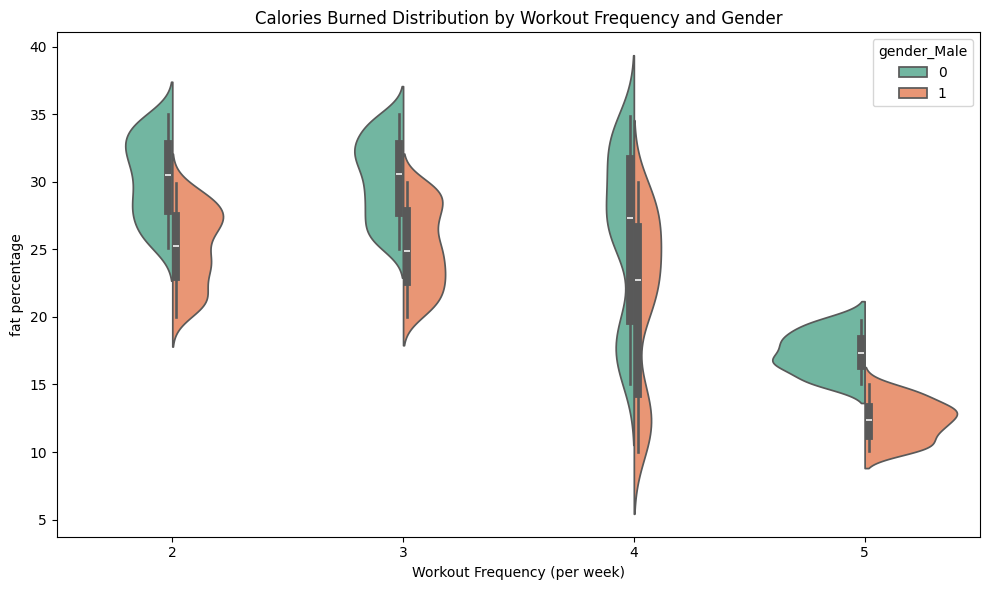

In [78]:
plt.figure(figsize=(10,6))
sns.violinplot(x='workout_frequency', y='fat_percentage', hue='gender_Male', data=df, split=True, palette='Set2')
plt.title("Calories Burned Distribution by Workout Frequency and Gender")
plt.xlabel("Workout Frequency (per week)")
plt.ylabel("fat percentage")
plt.tight_layout()
plt.savefig('../visuals/Violin_Calories_Gender.png')
plt.show()


In [79]:
fig = px.scatter(
    df, x='weight', y='fat_percentage',
    size='session_duration', color='experience_intensity_ratio',
    hover_data=['age','weight','height','workout_frequency'],
    title="Interactive Bubble: Weight vs Fat percentage"
)
fig.update_layout(
    xaxis_title="Weight",
    yaxis_title="fat percentage %"
)
fig.show()
